In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-price-3/DANGCEM.csv
/kaggle/input/stock-price-3/BUACEMENT.csv


In [3]:
import os;
os.listdir('/kaggle/input/')

['stock-price-3']

In [4]:
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy import stats
from datetime import datetime
import numpy as np  
import matplotlib.pyplot as plt  
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import entropy
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

df = pd.read_csv('/kaggle/input/stock-price-3/DANGCEM.csv') 
df2 = pd.read_csv('/kaggle/input/stock-price-3/BUACEMENT.csv') 

In [5]:
# Show the first 5 rows 
print(df.head())
print(df2.head())

       Date  Price   Open   High    Low   Vol.  Change %
0  5/2/2024  656.7  656.7  591.1  591.1   8950       0.0
1  5/3/2024  656.7  656.7  591.1  591.1  17650       0.0
2  5/6/2024  656.7  656.7  591.1  591.1   2360       0.0
3  5/7/2024  656.7  656.7  591.1  591.1   4460       0.0
4  5/8/2024  656.7  656.7  591.1  591.1   8010       0.0
       Date  Price   Open   High    Low   Vol.  Change %
0  5/2/2024  143.2  143.2  128.9  128.9   8800         0
1  5/3/2024  143.2  143.2  128.9  128.9  37390         0
2  5/6/2024  143.2  143.2  128.9  128.9  12230         0
3  5/7/2024  143.2  143.2  128.9  128.9  46090         0
4  5/8/2024  143.2  143.2  128.9  128.9  32560         0


In [6]:
# Show summary info about the DataFrame  
print(df.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      62 non-null     object 
 1   Price     62 non-null     float64
 2   Open      62 non-null     float64
 3   High      62 non-null     float64
 4   Low       62 non-null     float64
 5   Vol.      62 non-null     int64  
 6   Change %  62 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      62 non-null     object 
 1   Price     62 non-null     float64
 2   Open      62 non-null     float64
 3   High      62 non-null     float64
 4   Low       62 non-null     float64
 5   Vol.      62 non-null     int64  
 6   Change %  62 non-null     int64  
dtypes: float64(4), int64(2

In [7]:
# Get the dimensions of the DataFrame      
print(df.shape)
print(df2.shape)

(62, 7)
(62, 7)


In [8]:
# Get the dimensions of the DataFrame      
print(df.shape)
print(df2.shape)

(62, 7)
(62, 7)


In [9]:
# Data cleaning  
df.dropna(inplace=True)  
df2.dropna(inplace=True)  

In [10]:
# Summary statistics  
print(df.describe())   
print(df2.describe())  

            Price        Open        High         Low           Vol.  \
count   62.000000   62.000000   62.000000   62.000000      62.000000   
mean   652.467742  653.525806  589.329032  588.240323   31694.838710   
std     16.247520   14.191546    9.842804   12.785372   70335.620636   
min    591.100000  591.100000  532.000000  532.000000    2360.000000   
25%    656.700000  656.700000  591.100000  591.100000    5510.000000   
50%    656.700000  656.700000  591.100000  591.100000    9335.000000   
75%    656.700000  656.700000  591.100000  591.100000   20037.500000   
max    656.700000  656.700000  591.500000  591.100000  498300.000000   

        Change %  
count  62.000000  
mean   -0.161129  
std     1.268731  
min    -9.990000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     0.000000  
              Price          Open        High           Low           Vol.  \
count  6.200000e+01  6.200000e+01   62.000000  6.200000e+01      62.000000   
mean   1.432000e+02  1.4

In [11]:
# List all columns in the DataFrame  
print(df.columns)       
print(df2.columns)      

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [16]:
# Set 'Date' as index
df.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

In [17]:
# Calculate daily returns
df['Returns'] = df['Price'].pct_change()
df2['Returns'] = df2['Price'].pct_change()

In [19]:
# Function to calculate complexity measures
def calculate_complexity(returns):
    volatility = np.std(returns)
    kurtosis = stats.kurtosis(returns)
    skewness = stats.skew(returns)
    hurst_exponent = np.polyfit(np.log(range(1, len(returns)+1)), 
                                np.log(pd.Series(returns).cumsum()), 1)[0]
    return volatility, kurtosis, skewness, hurst_exponent

In [20]:
# Calculate complexity measures for both companies
dangcem_complexity = calculate_complexity(df['Returns'].dropna())
buacement_complexity = calculate_complexity(df2['Returns'].dropna())

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# Print results
print("Dangote Cement Complexity Measures:")
print(f"Volatility: {dangcem_complexity[0]:.4f}")
print(f"Kurtosis: {dangcem_complexity[1]:.4f}")
print(f"Skewness: {dangcem_complexity[2]:.4f}")
print(f"Hurst Exponent: {dangcem_complexity[3]:.4f}")

Dangote Cement Complexity Measures:
Volatility: 0.0127
Kurtosis: 56.0167
Skewness: -7.6169
Hurst Exponent: nan


In [22]:
print("\nBUA Cement Complexity Measures:")
print(f"Volatility: {buacement_complexity[0]:.4f}")
print(f"Kurtosis: {buacement_complexity[1]:.4f}")
print(f"Skewness: {buacement_complexity[2]:.4f}")
print(f"Hurst Exponent: {buacement_complexity[3]:.4f}")


BUA Cement Complexity Measures:
Volatility: 0.0000
Kurtosis: nan
Skewness: nan
Hurst Exponent: nan


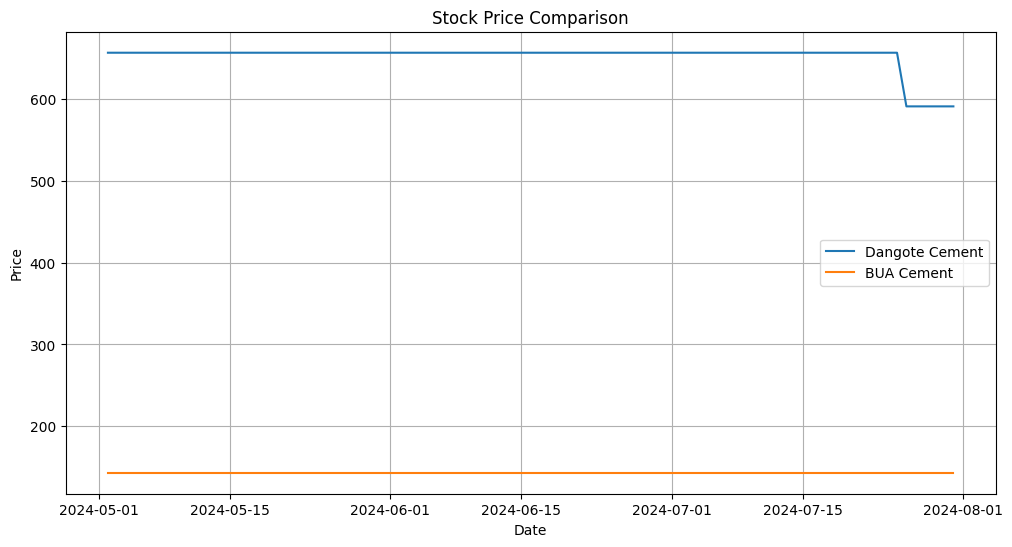

In [23]:
# Visualize price movements
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Dangote Cement')
plt.plot(df2.index, df2['Price'], label='BUA Cement')
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_30/4050889336.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Returns'].dropna(), label='Dangote Cement', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/4050889336.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2['Returns'].dropna(), label='BUA Cement', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
 

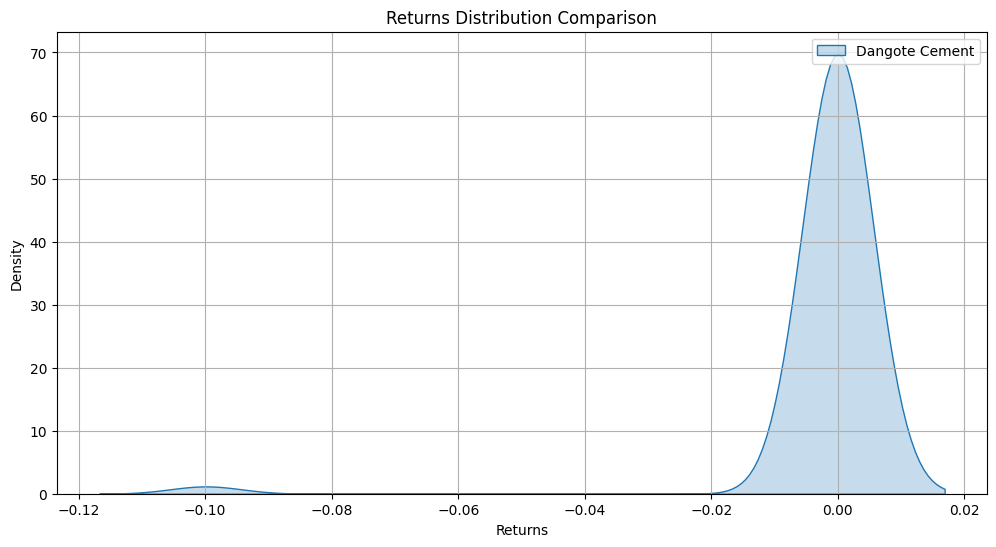

In [24]:
# Visualize returns distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Returns'].dropna(), label='Dangote Cement', shade=True)
sns.kdeplot(df2['Returns'].dropna(), label='BUA Cement', shade=True)
plt.title('Returns Distribution Comparison')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Calculate and plot rolling volatility
window = 20
df['Rolling_Volatility'] = df['Returns'].rolling(window=window).std() * np.sqrt(252)
df2['Rolling_Volatility'] = df2['Returns'].rolling(window=window).std() * np.sqrt(252)

In [36]:
# Print the rolling volatility
df['Rolling_Volatility'] 
# Print the rolling volatility
df2['Rolling_Volatility'] 

Date
2024-05-02    NaN
2024-05-03    NaN
2024-05-06    NaN
2024-05-07    NaN
2024-05-08    NaN
             ... 
2024-07-25    0.0
2024-07-26    0.0
2024-07-29    0.0
2024-07-30    0.0
2024-07-31    0.0
Name: Rolling_Volatility, Length: 62, dtype: float64

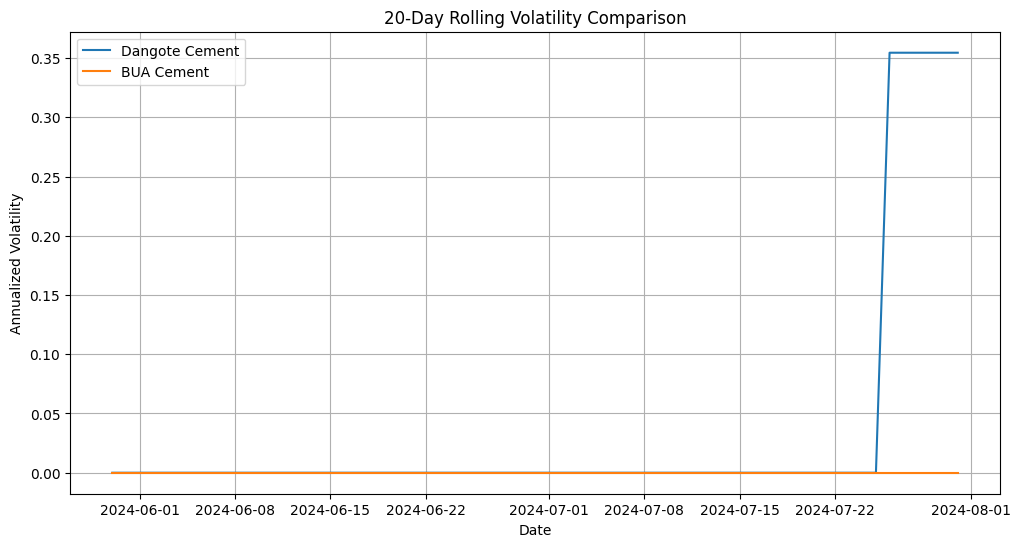

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Rolling_Volatility'], label='Dangote Cement')
plt.plot(df2.index, df2['Rolling_Volatility'], label='BUA Cement')
plt.title(f'{window}-Day Rolling Volatility Comparison')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Perform Augmented Dickey-Fuller test for stationarity
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

In [29]:
print("Augmented Dickey-Fuller Test for Dangote Cement:")
adf_test(df['Returns'])
print("Augmented Dickey-Fuller Test for BUA Cement:")
adf_test(df2['Returns'])


Augmented Dickey-Fuller Test for Dangote Cement:
ADF Statistic: -7.745966692414834
p-value: 1.0318271382286764e-11
Critical Values:
	1%: -3.5443688564814813
	5%: -2.9110731481481484
	10%: -2.5931902777777776
Augmented Dickey-Fuller Test for BUA Cement:


ValueError: Invalid input, x is constant

In [37]:
# Perform Augmented Dickey-Fuller test for stationarity  
def adf_test(series):  
    # Drop NaN values  
    series = series.dropna()  
    
    # Check if the series is constant  
    if series.nunique() <= 1:  
        print("The series is constant; ADF test cannot be performed.")  
        return  
    
    result = adfuller(series)  
    print(f'ADF Statistic: {result[0]}')  
    print(f'p-value: {result[1]}')  
    print('Critical Values:')  
    for key, value in result[4].items():  
        print(f'\t{key}: {value}')  

# Assuming df is your DataFrame containing the returns  
print("Augmented Dickey-Fuller Test for Dangote Cement:")  
adf_test(df['Returns'])  # Ensure 'Returns' is the correct column name  

print("Augmented Dickey-Fuller Test for BUA Cement:")  
adf_test(df2['Returns'])  # Ensure df2 is defined and 'Returns' is the correct column name  

Augmented Dickey-Fuller Test for Dangote Cement:
ADF Statistic: -7.745966692414834
p-value: 1.0318271382286764e-11
Critical Values:
	1%: -3.5443688564814813
	5%: -2.9110731481481484
	10%: -2.5931902777777776
Augmented Dickey-Fuller Test for BUA Cement:
The series is constant; ADF test cannot be performed.


In [30]:
# Calculate and compare entropy
dangcem_entropy = entropy(df['Returns'].dropna().values)
buacement_entropy = entropy(df2['Returns'].dropna().values)

In [31]:
print(f"\nEntropy of Dangote Cement returns: {dangcem_entropy:.4f}")
print(f"Entropy of BUA Cement returns: {buacement_entropy:.4f}")


Entropy of Dangote Cement returns: 0.0000
Entropy of BUA Cement returns: nan


In [32]:
# Perform seasonal decomposition
def plot_seasonal_decompose(series, title):
    result = seasonal_decompose(series, model='additive', period=30)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
    result.observed.plot(ax=ax1)
    ax1.set_title(f'{title} - Observed')
    result.trend.plot(ax=ax2)
    ax2.set_title('Trend')
    result.seasonal.plot(ax=ax3)
    ax3.set_title('Seasonal')
    result.resid.plot(ax=ax4)
    ax4.set_title('Residual')
    plt.tight_layout()
    plt.show()

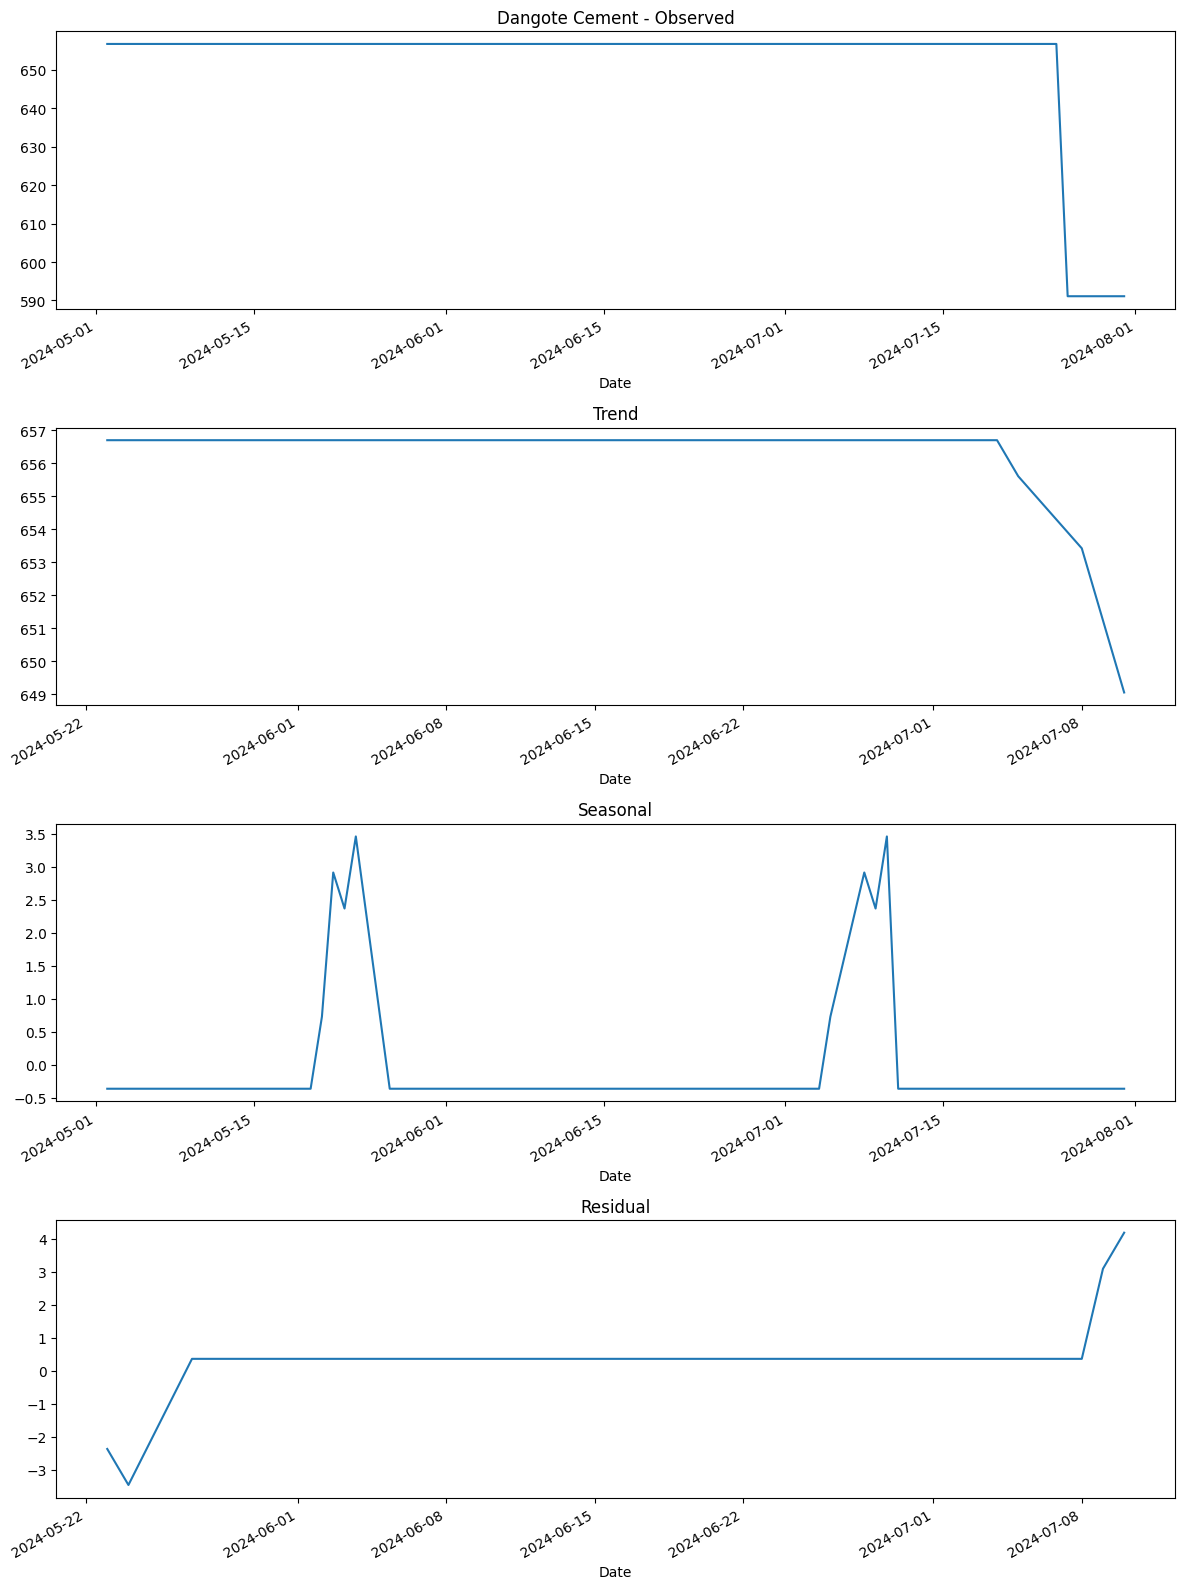

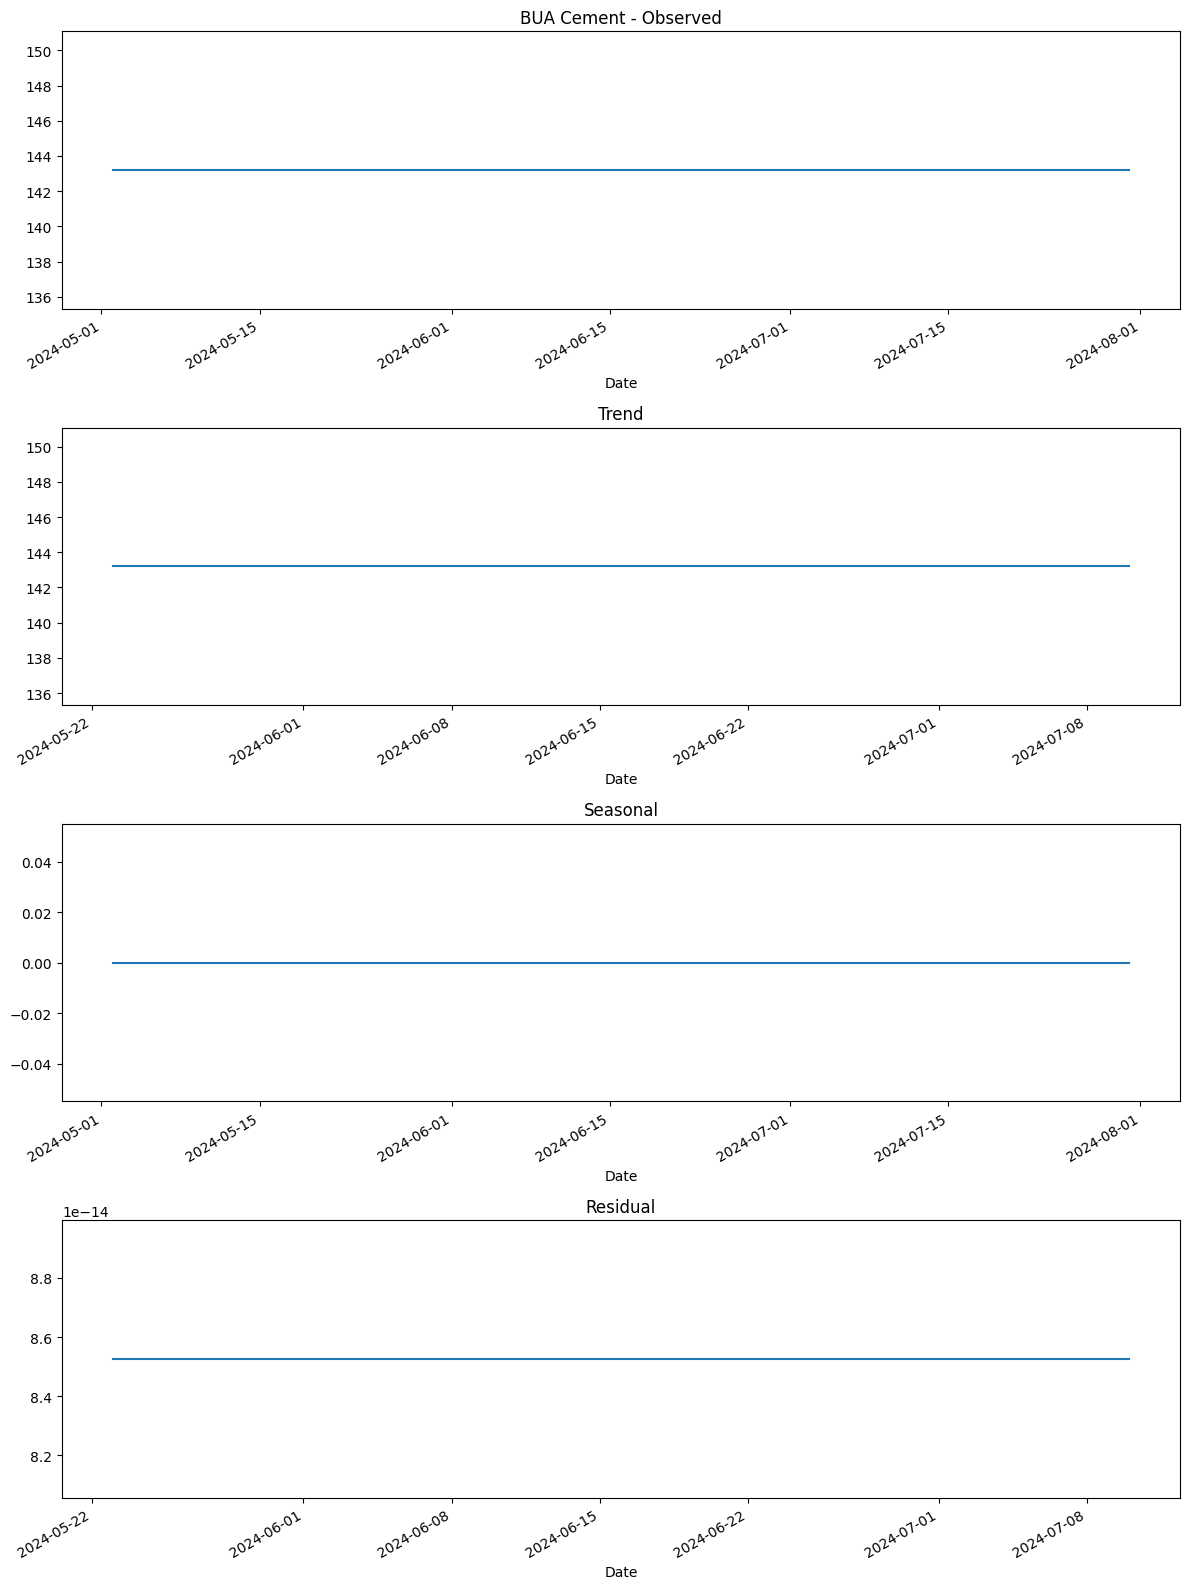

In [33]:
plot_seasonal_decompose(df['Price'], 'Dangote Cement')
plot_seasonal_decompose(df2['Price'], 'BUA Cement')


In [34]:
# Correlation analysis
correlation = df['Returns'].corr(df2['Returns'])
print(f"\nCorrelation between Dangote Cement and BUA Cement returns: {correlation:.4f}")


Correlation between Dangote Cement and BUA Cement returns: nan


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


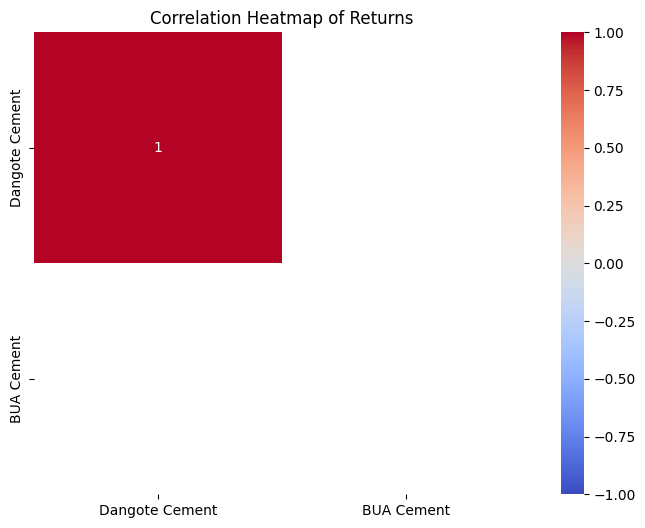

In [39]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = pd.DataFrame({'Dangote Cement': df['Returns'], 'BUA Cement': df2['Returns']}).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Returns')
plt.show()

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]



Correlation between Dangote Cement and BUA Cement returns: nan


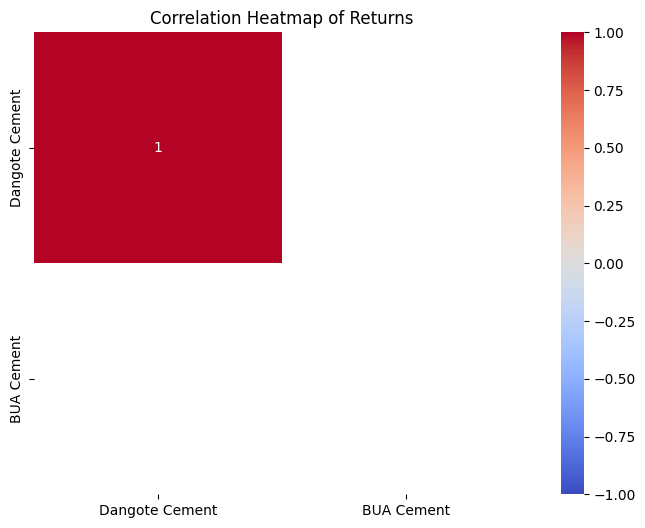

In [38]:
# Calculate daily returns  
df['Returns'] = df['Price'].pct_change()  
df2['Returns'] = df2['Price'].pct_change()  

# Correlation analysis  
correlation = df['Returns'].corr(df2['Returns'])  
print(f"\nCorrelation between Dangote Cement and BUA Cement returns: {correlation:.4f}")  

# Plot correlation heatmap  
plt.figure(figsize=(8, 6))  
correlation_matrix = pd.DataFrame({'Dangote Cement': df['Returns'], 'BUA Cement': df2['Returns']}).corr()  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)  
plt.title('Correlation Heatmap of Returns')  
plt.show()  